# Project: Develop a Simple DataAnalysis Application with MachineLearning model

# INTRODUCTION:
The main objective of this project is to analyze and predict salary using a machine learning approach. In today’s world, salary prediction plays a vital role in various fields like recruitment, business analytics, and financial planning.


This project focuses on analyzing the given dataset which contains information like job title, employee experience, company details, and most importantly — salary details. By applying data preprocessing, visualization, and machine learning techniques, this project helps in understanding the relationship between various features and salary.


In this project, Linear Regression — a supervised machine learning algorithm — is used to predict the salary based on input features. The main aim of this project is to make accurate predictions and provide useful insights from the dataset for better understanding and future analysis.


# DATA INPUT:

In [ ]:
import pandas as pd
file_path=('/content/archive (10).zip')
data=pd.read_csv(file_path)
print(data.head())

   work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location company_size  
0               NL            L  
1               US

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB
None


In [ ]:
print(data.describe())

          work_year        salary  salary_in_usd  remote_ratio
count  88584.000000  8.858400e+04   88584.000000  88584.000000
mean    2024.034758  1.619323e+05  157567.798417     21.286011
std        0.620370  1.965317e+05   73531.373158     40.831018
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2024.000000  1.060000e+05  106097.250000      0.000000
50%     2024.000000  1.470000e+05  146307.000000      0.000000
75%     2024.000000  1.995000e+05  198600.000000      0.000000
max     2025.000000  3.040000e+07  800000.000000    100.000000


# DATA PROCESSING

In [ ]:
print(data.shape)

(88584, 11)


In [ ]:
#duplicates
print("Number of duplicates:", data.duplicated().sum())

Number of duplicates: 44340


In [ ]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data['experience_level'].fillna(data['experience_level'].mode() [0], inplace=True)

<ipython-input-11-58fc198bb345>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['experience_level'].fillna(data['experience_level'].mode() [0], inplace=True)


In [ ]:
data['job_title'].fillna(data['job_title'].mode() [0], inplace=True)

<ipython-input-12-b8909bdda626>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['job_title'].fillna(data['job_title'].mode() [0], inplace=True)


In [ ]:
data['employee_residence'].fillna(data['employee_residence'].mode() [0], inplace=True)

<ipython-input-13-72e37eb3cd15>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['employee_residence'].fillna(data['employee_residence'].mode() [0], inplace=True)


In [ ]:
print(data.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [ ]:
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [ ]:
print(data.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


# DATA VISUALIZATION

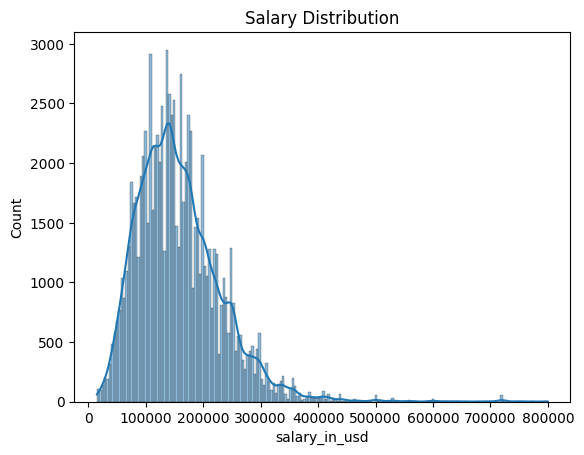

In [ ]:
#Histplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data['salary_in_usd'], kde=True)
plt.title("Salary Distribution")
plt.show()

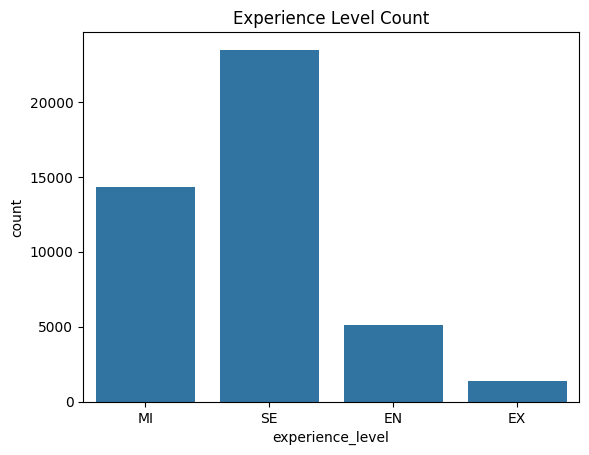

In [ ]:
#Countplot For Experience_Level
sns.countplot(x='experience_level',data=data)
plt.title("Experience Level Count")
plt.show()

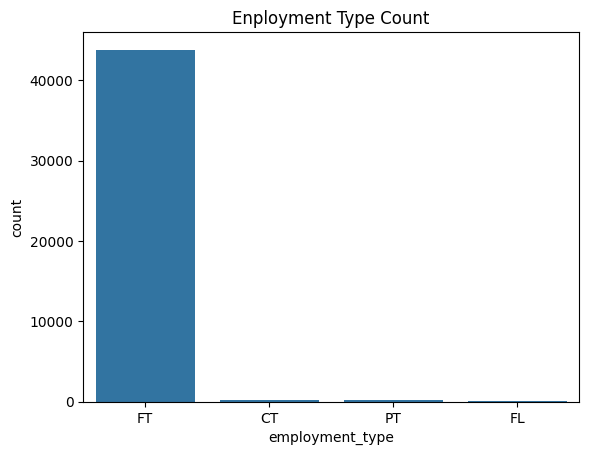

In [ ]:
#Countplot For Employment_Type
sns.countplot(x='employment_type',data=data)
plt.title("Enployment Type Count")
plt.show()

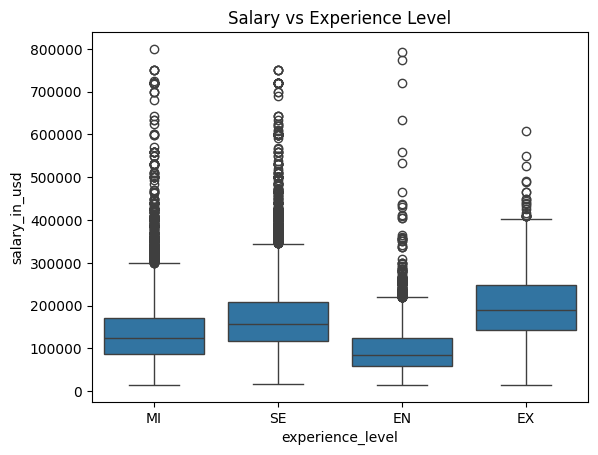

In [ ]:
#Boxplot Salary vs Experience Level
sns.boxplot(x='experience_level',y='salary_in_usd',data=data)
plt.title("Salary vs Experience Level")
plt.show()

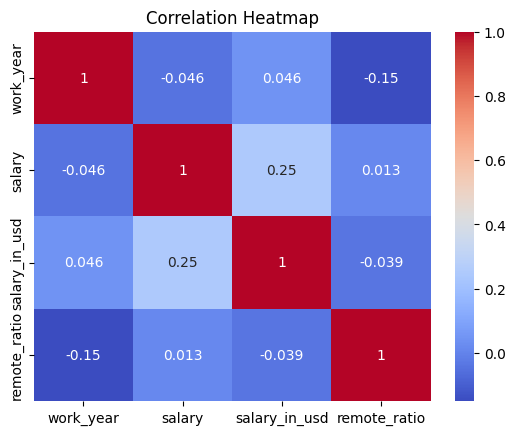

In [ ]:
#Correlation Heatmap
numeric_data=data.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

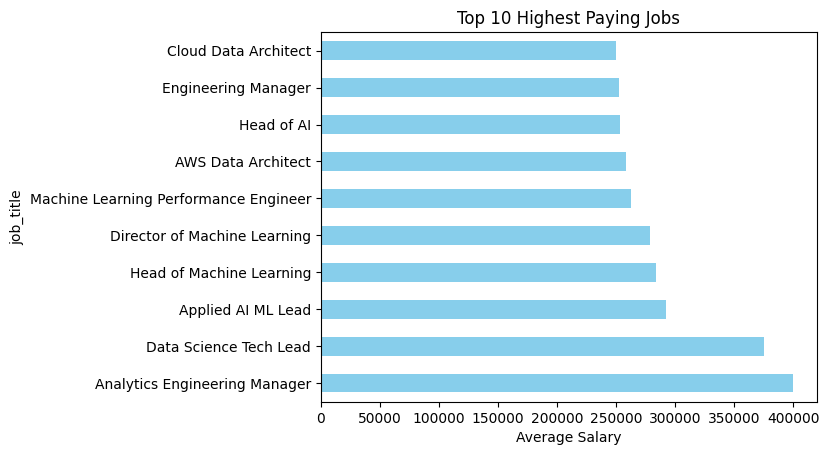

In [ ]:
top_jobs=data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_jobs.plot(kind='barh',color='skyblue')
plt.title("Top 10 Highest Paying Jobs")
plt.xlabel("Average Salary")
plt.show()


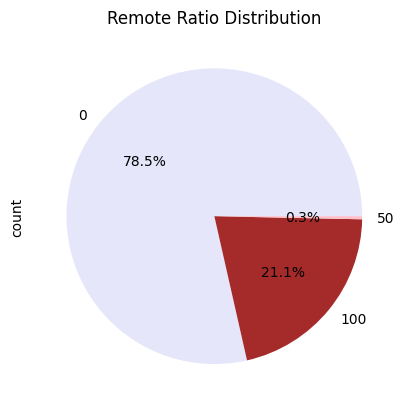

In [ ]:
#Piechart for Remote Ratio Distribution
data['remote_ratio'].value_counts().plot.pie(autopct='%1.1f%%',colors=['Lavender','brown','pink'])
plt.title("Remote Ratio Distribution")
plt.show()

# MODEL DEVELOPMENT

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd


In [ ]:
# Separate dependent (y) and independent (X) variables
X = data.drop('salary_in_usd', axis=1)  # Independent variables
y = data['salary_in_usd']  # Dependent variable (target)

In [ ]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

In [ ]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))  # Mean Absoulte Error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # Mean Squared Error
print("R2 Score:", r2_score(y_test, y_pred))  # R2 Score

Mean Absolute Error: 31371.000275403832
Mean Squared Error: 8432313688.477278
R2 Score: -0.5267409444376521


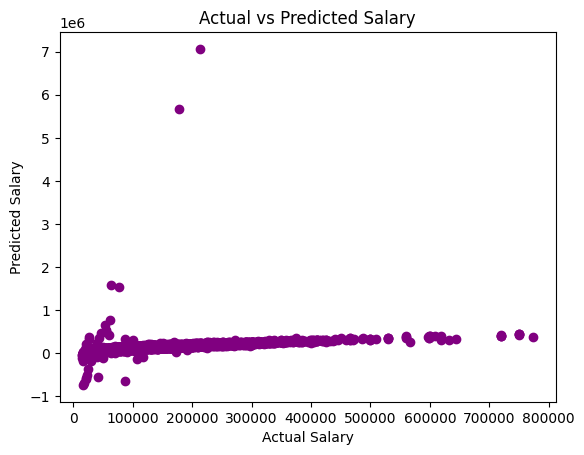

In [ ]:
# Actual vs Predicted Graph
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

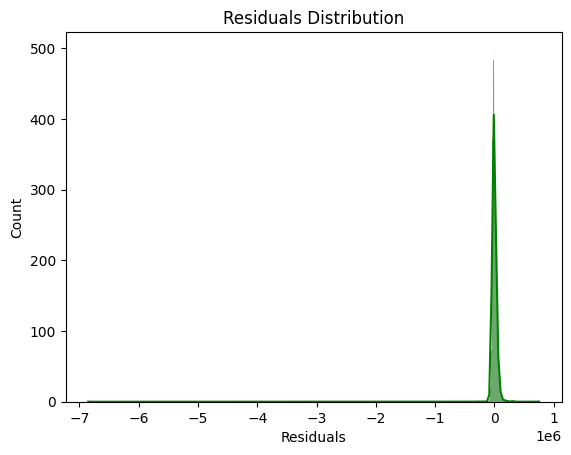

In [ ]:
# Residual Plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='green')
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

# CONCLUSION:
  The primary objective of this project was to predict the Salary in USD based on various independent factors such as experience level, employment type, job title, employee residence, company location, and other related features.


  The dataset was initially cleaned by checking for null values, duplicate records, and outliers. After that, detailed exploratory data analysis (EDA) was done with the help of various visualizations like histograms, boxplots, countplots, and correlation heatmaps to understand the data deeply.

  For the model development, Linear Regression algorithm was used to predict the salary. The dataset was split into training and testing parts to evaluate the model performance.
